# problem statement
You have been hired as a data analyst for an online e-commerce company. The company has collected sales data for the past year and would like you to analyze it. The goal is to uncover insights that will help improve sales and customer satisfaction. To address business questions, you will use various data science techniques such as exploratory data analysis (EDA), data cleaning, and machine learning.

The dataset contains the following fields:
order_id: Unique ID for each order
customer_id: Unique ID for each customer
order_date: Date of the order
category: Category of the product
product: Name of the product
quantity: Quantity of products ordered
price: Price per unit of the product
total_amount: Total amount paid for the order
order_status: Whether the order was completed or canceled
payment_method: How the customer paid for the order (Credit Card, PayPal, etc.)
customer_location: Country where the customer is located

# Objective:

Gather insights to improve sales performance and customer satisfaction

# Key questions:

1. What is the growth total sales rate over time?
2. How do the different seasons affect  sales? (seasonality) 
3. What is the average total spent per category?
4. What are the main factors affecting canceled orders?(price, product, payment method, customer demographic)
5. What is/are the locations with the highest total sales?
6. What is the customer’s preferred method of payment?


# Data exploration and cleaning

1. Check missing values & Handle missing values.(Factors affecting how to handle the data
Based on the type of data and the percentage/number of missing values
Based on the column)
2. Drop the missing values based on the threshold set by the organizaiton and the importance of the data point to the organization
3. Using a model based imputation eg using linear regression, K-nearest neighbors etc that use other features to find the missing values.

4. Checking and handling outliers

What would we consider outliers in our dataset?
Outliers occurring when promotions are there
Visualize the outliers in the dataset

# Data Analysis

1. What’s the growth rate over time?(Past and current
Future)
2. How do the different seasons affect  sales? (seasonality) 
Columns to use:
Order_date
Order_status
Total_amount
3. What constitutes seasonility in the dataset?(Festive seasons
Weather seasons (summer, winter, autumn, spring)
Marketing seasons)
4. Visualize sales over time and check on spikes
5. Order date (frequency) and num of orders can help understand spikes of a particular time
6. Use time series analysis to help understand trends, seasonality
7. Basing on the patterns uncovered, you can associate it with a particular seasonality eg holidays, marketing etc
8. What is the average total spent per category?
9. Visualize average total amount vs category using a bar graph

What are the main factors affecting canceled orders?(price, product, payment method, customer demographic)
Columns to check:
Payment method
Customer location
9. Visualize the cancelled orders basing on the payment method and customer locations
10. What is/are the locations with the highest total sales?
11. Visualize the completed orders total amount by customer location using a bar chart
12. What is the customer’s preferred method of payment?
13. Count distinct values for the preferred method
14. Visualize the above using a bar graph or pie chart
15. Come up with a dashboard using Tableau or Google Looker to visualize our findings to present to our stakeholders.

# Model Selection
Considerations:
Recommendation Engine
Segmentation Model - segmenting customers for advertising/marketing purposes (RFM values)

# UNDERSTANDING DATASET

In [29]:
# importing key libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
%matplotlib inline
# from ydata_profiling import ProfileReport

In [30]:
# loading datasets
customer_df = pd.read_csv('case-study/Customers.csv')
order_df = pd.read_csv('case-study/OrderData.csv')
products_df = pd.read_csv('case-study/Products.csv')

In [31]:
customer_df.head()

,CustomerID,CustomerName,Email,Phone,JoinDate,LocationID,TotalSpent
0,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.20
1,2,Customer_2,customer2@example.com,123-456-7892,2020-01-02,2,6722.81
2,3,Customer_3,customer3@example.com,123-456-7893,2020-01-03,1,2212.24
3,4,Customer_4,customer4@example.com,123-456-7894,2020-01-04,5,8695.29
4,5,Customer_5,customer5@example.com,123-456-7895,2020-01-05,39,7658.65


In [32]:
order_df.head()

,OrderID,CustomerID,OrderDate,LocationID,ProductID,Quantity,TotalPrice,OrderStatus
0,1,702,2023-01-01 00:00:00,41,65,7,7.35,Pending
1,2,470,2023-01-01 01:00:00,48,196,18,227.85,Completed
2,3,945,2023-01-01 02:00:00,26,28,3,99.73,Cancelled
3,4,494,2023-01-01 03:00:00,12,87,9,93.40,Pending
4,5,835,2023-01-01 04:00:00,29,139,13,341.56,Completed


In [33]:
products_df.head()

,ProductID,ProductName,Category,UnitPrice,ShelfLife
0,1,Product_1,Food,13.97,192
1,2,Product_2,Merchandise,40.52,355
2,3,Product_3,Food,39.68,77
3,4,Product_4,Food,20.59,104
4,5,Product_5,Beverage,36.45,338


In [34]:
customer_df.shape

(1000, 7)

In [35]:
order_df.shape

(10000, 8)

In [36]:
products_df.shape

(200, 5)

In [37]:
customer_df.info(),
order_df.info(),
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    1000 non-null   int64  
 1   CustomerName  1000 non-null   object 
 2   Email         1000 non-null   object 
 3   Phone         1000 non-null   object 
 4   JoinDate      1000 non-null   object 
 5   LocationID    1000 non-null   int64  
 6   TotalSpent    1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      10000 non-null  int64  
 1   CustomerID   10000 non-null  int64  
 2   OrderDate    10000 non-null  object 
 3   LocationID   10000 non-null  int64  
 4   ProductID    10000 non-null  int64  
 5   Quantity     10000 non-null  int64  
 6

In [38]:
customer_df.describe(),
order_df.describe(),
products_df.describe()

,ProductID,UnitPrice,ShelfLife
count,200.000000,200.000000,200.000000
mean,100.500000,25.505250,186.955000
std,57.879185,14.662776,104.955856
min,1.000000,1.210000,1.000000
25%,50.750000,10.927500,103.750000
50%,100.500000,26.210000,190.000000
75%,150.250000,38.405000,283.250000
max,200.000000,49.940000,364.000000


In [39]:
# 
df = pd.merge(customer_df, order_df, on='CustomerID')

In [40]:
df.head()

,CustomerID,CustomerName,Email,Phone,JoinDate,LocationID_x,TotalSpent,OrderID,OrderDate,LocationID_y,ProductID,Quantity,TotalPrice,OrderStatus
0,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,1281,2023-02-23 08:00:00,22,179,9,55.78,Completed
1,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,5248,2023-08-07 15:00:00,21,174,8,196.56,Pending
2,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,6273,2023-09-19 08:00:00,4,167,10,456.28,Completed
3,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,9054,2024-01-13 05:00:00,47,80,19,484.18,Pending
4,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,9532,2024-02-02 03:00:00,29,54,1,329.73,Completed


In [41]:
# 
ecom_df = pd.merge(df, products_df, on='ProductID')

In [42]:
ecom_df.head()

,CustomerID,CustomerName,Email,Phone,JoinDate,LocationID_x,TotalSpent,OrderID,OrderDate,LocationID_y,ProductID,Quantity,TotalPrice,OrderStatus,ProductName,Category,UnitPrice,ShelfLife
0,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,1281,2023-02-23 08:00:00,22,179,9,55.78,Completed,Product_179,Merchandise,24.97,284
1,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,5248,2023-08-07 15:00:00,21,174,8,196.56,Pending,Product_174,Beverage,16.88,113
2,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,6273,2023-09-19 08:00:00,4,167,10,456.28,Completed,Product_167,Merchandise,5.53,329
3,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,9054,2024-01-13 05:00:00,47,80,19,484.18,Pending,Product_80,Food,47.67,311
4,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,9532,2024-02-02 03:00:00,29,54,1,329.73,Completed,Product_54,Food,38.92,286


In [43]:
ecom_df.shape

(10000, 18)

In [44]:
ecom_df.rename(columns={
'LocationID_x': 'CustomerAddress', 'LocationID_y': 'StoreAddress'
}, inplace=True)

In [45]:
ecom_df.head()

,CustomerID,CustomerName,Email,Phone,JoinDate,CustomerAddress,TotalSpent,OrderID,OrderDate,StoreAddress,ProductID,Quantity,TotalPrice,OrderStatus,ProductName,Category,UnitPrice,ShelfLife
0,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,1281,2023-02-23 08:00:00,22,179,9,55.78,Completed,Product_179,Merchandise,24.97,284
1,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,5248,2023-08-07 15:00:00,21,174,8,196.56,Pending,Product_174,Beverage,16.88,113
2,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,6273,2023-09-19 08:00:00,4,167,10,456.28,Completed,Product_167,Merchandise,5.53,329
3,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,9054,2024-01-13 05:00:00,47,80,19,484.18,Pending,Product_80,Food,47.67,311
4,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,9532,2024-02-02 03:00:00,29,54,1,329.73,Completed,Product_54,Food,38.92,286


In [46]:
# adding payment methods column(paypal,mpesa,cash,creditcard)
payment_methods = ['paypal' ,'mpesa' ,'cash' ,'creditcard']

In [47]:
# adding the payments column
ecom_df['payment_methods'] = np.random.choice(payment_methods,size=len(ecom_df))

In [48]:
ecom_df.head()

,CustomerID,CustomerName,Email,Phone,JoinDate,CustomerAddress,TotalSpent,OrderID,OrderDate,StoreAddress,ProductID,Quantity,TotalPrice,OrderStatus,ProductName,Category,UnitPrice,ShelfLife,payment_methods
0,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,1281,2023-02-23 08:00:00,22,179,9,55.78,Completed,Product_179,Merchandise,24.97,284,mpesa
1,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,5248,2023-08-07 15:00:00,21,174,8,196.56,Pending,Product_174,Beverage,16.88,113,cash
2,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,6273,2023-09-19 08:00:00,4,167,10,456.28,Completed,Product_167,Merchandise,5.53,329,mpesa
3,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,9054,2024-01-13 05:00:00,47,80,19,484.18,Pending,Product_80,Food,47.67,311,mpesa
4,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,9532,2024-02-02 03:00:00,29,54,1,329.73,Completed,Product_54,Food,38.92,286,creditcard


In [49]:
ecom_df['payment_methods'].value_counts()

payment_methods
creditcard    2560
cash          2513
paypal        2504
mpesa         2423
Name: count, dtype: int64

# EDA and Visualization

## 1. What’s the customer & sales growth rate over time?(Past and current Future)

## Sales/Revenue growth rate

In [50]:
# Convert column to datetimeframe
ecom_df['OrderDate'] = pd.to_datetime(ecom_df['OrderDate'])

In [51]:
# Extract year from order date
ecom_df['year'] = ecom_df['OrderDate'].dt.year

In [52]:
# Extract month from order date
ecom_df['month'] = ecom_df['OrderDate'].dt.month

In [53]:
# calculate growth rate  (2023 - 2024)
ecom_df['Growth Rate (%)'] = ecom_df['TotalSpent'].pct_change() * 100

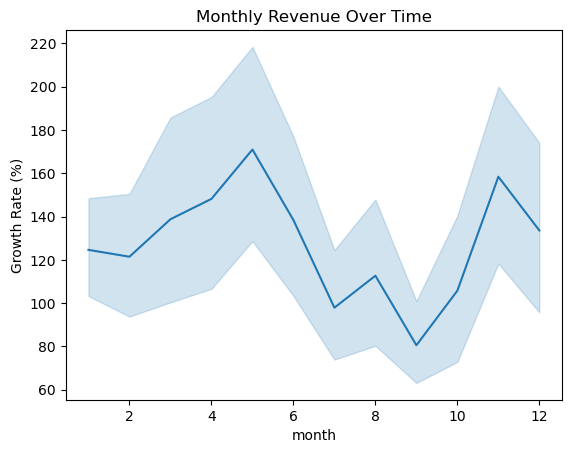

In [26]:
# Visualization of growth rate
sns.lineplot(data=ecom_df, x='month', y='Growth Rate (%)')
plt.title('Monthly Revenue Over Time')
plt.show()

## Insight:
The growth rate is higher the beiginning of the year and then it drops towards middle of the year and plateaus until the end of the year.

## Customer growth rate

- convert joindate to datetimefrime
- extract the monthcustomer joined
- calculate count of customers per month
- find monthly customer growth rate
- visualize using line graph
- * check customer purchases
- 

In [27]:
ecom_df.columns

Index(['CustomerID', 'CustomerName', 'Email', 'Phone', 'JoinDate',
       'CustomerAddress', 'TotalSpent', 'OrderID', 'OrderDate', 'StoreAddress',
       'ProductID', 'Quantity', 'TotalPrice', 'OrderStatus', 'ProductName',
       'Category', 'UnitPrice', 'ShelfLife', 'payment_methods', 'year',
       'month', 'Growth Rate (%)'],
      dtype='object')

In [28]:
ecom_df['JoinDate'] = pd.to_datetime(ecom_df['JoinDate'])
ecom_df['j_month'] = ecom_df['JoinDate'].dt.month


In [29]:
ecom_df['monthly_customer_count'] = ecom_df.groupby('j_month')['CustomerID'].nunique()

In [30]:
ecom_df['customer_Growth_Rate_(%)'] = ecom_df['monthly_customer_count'].pct_change() * 100

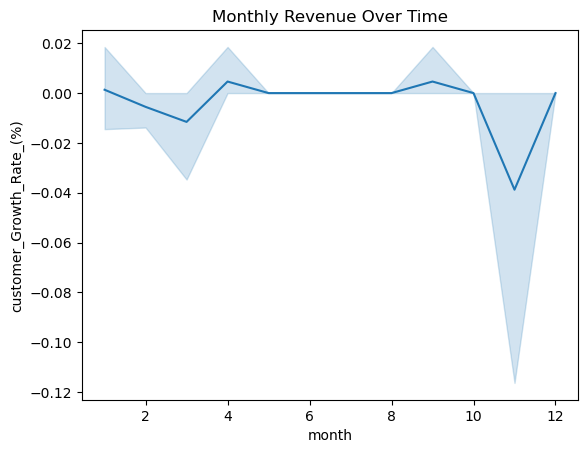

In [31]:
sns.lineplot(data=ecom_df,x='month',y = 'customer_Growth_Rate_(%)')
plt.title('Monthly Revenue Over Time')
plt.show()

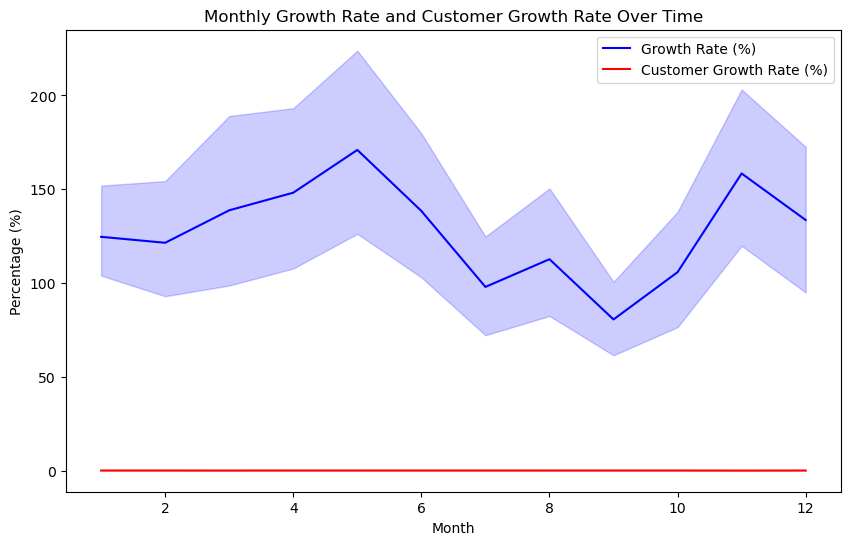

In [32]:
plt.figure(figsize=(10, 6))
# Plot the Growth Rate (%)
sns.lineplot(data=ecom_df, x='month', y='Growth Rate (%)', label='Growth Rate (%)', color='b')
# Plot the Customer Growth Rate (%)
sns.lineplot(data=ecom_df, x='month', y='customer_Growth_Rate_(%)', label='Customer Growth Rate (%)', color='r')
# Add a title and labels
plt.title('Monthly Growth Rate and Customer Growth Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
# Show the legend
plt.legend()
# Display the combined plot
plt.show()

# What is the average total spent per category?

In [60]:
ecom_df.head(5)

,CustomerID,CustomerName,Email,Phone,JoinDate,CustomerAddress,TotalSpent,OrderID,OrderDate,StoreAddress,...,TotalPrice,OrderStatus,ProductName,Category,UnitPrice,ShelfLife,payment_methods,year,month,Growth Rate (%)
0,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,1281,2023-02-23 08:00:00,22,...,55.78,Completed,Product_179,Merchandise,24.97,284,mpesa,2023,2,NaN
1,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,5248,2023-08-07 15:00:00,21,...,196.56,Pending,Product_174,Beverage,16.88,113,cash,2023,8,0.0
2,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,6273,2023-09-19 08:00:00,4,...,456.28,Completed,Product_167,Merchandise,5.53,329,mpesa,2023,9,0.0
3,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,9054,2024-01-13 05:00:00,47,...,484.18,Pending,Product_80,Food,47.67,311,mpesa,2024,1,0.0
4,1,Customer_1,customer1@example.com,123-456-7891,2020-01-01,13,584.2,9532,2024-02-02 03:00:00,29,...,329.73,Completed,Product_54,Food,38.92,286,creditcard,2024,2,0.0


In [62]:
# cloumns total spent 
ecom_df[['TotalSpent','OrderStatus']]

,TotalSpent,OrderStatus
0,584.20,Completed
1,584.20,Pending
2,584.20,Completed
3,584.20,Pending
4,584.20,Completed
...,...,...
9995,3827.38,Completed
9996,3827.38,Cancelled
9997,3827.38,Cancelled
9998,3827.38,Cancelled


In [59]:
ecom_df['Category'].unique()

array(['Merchandise', 'Beverage', 'Food'], dtype=object)

In [65]:
complete = ecom_df[ecom_df['OrderStatus']=='Completed'].reset_index() 

In [66]:
total_spent = complete.groupby('Category')['TotalSpent'].mean()

In [67]:
total_spent

Category
Beverage       4945.649982
Food           5179.705115
Merchandise    5075.502327
Name: TotalSpent, dtype: float64

* Beverage had the lowest avarage compared to the other two categories 
* Recommendation:
  - Additional promotions in the Beverage category also do product bundling on Beverage and Food
  - Do RFM analysis to identify high value and loyal customers then do target marketing compaigns